/var/folders/2_/60s36pk17lq0ltwcttxd9p7m0000gn/T/ipykernel_9756/3418089869.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_data = data.resample('A').sum()


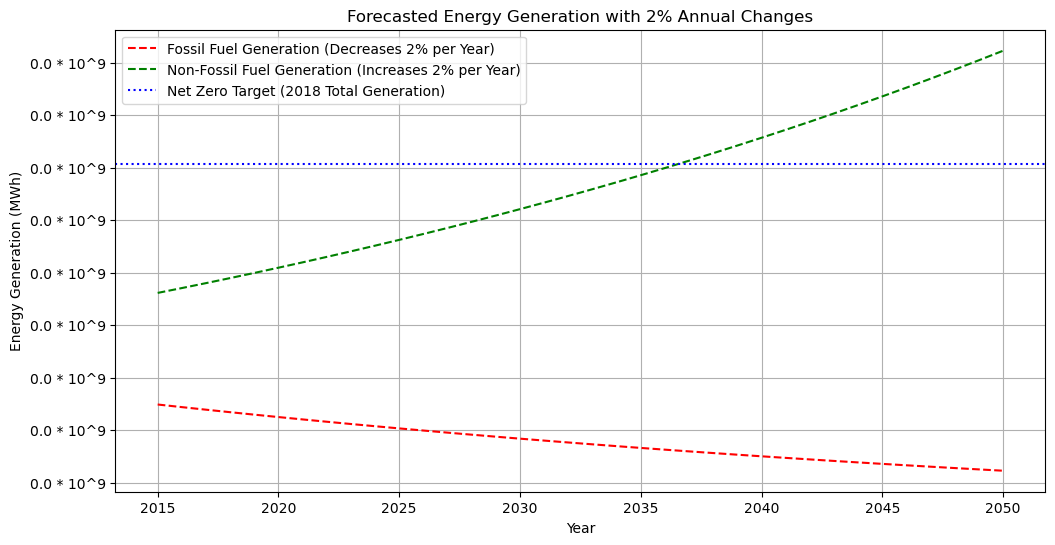

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load your data
energy_df = pd.read_csv('../energy_dataset.csv')
weather_df = pd.read_csv('../weather_features.csv')

# Merge and prepare data
data = pd.merge(energy_df, weather_df, left_on='time', right_on='dt_iso')

# Ensure 'time' is converted to datetime and set as index
data['time'] = pd.to_datetime(data['time'], utc=True)
data.set_index('time', inplace=True)

# Summing fossil and non-fossil fuel generation
fossil_fuel_columns = [
    'generation fossil brown coal/lignite', 'generation fossil coal-derived gas',
    'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil'
]
data['total_fossil_fuel_generation'] = data[fossil_fuel_columns].sum(axis=1)

non_fossil_fuel_columns = [
    'generation biomass', 'generation geothermal', 
    'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage', 
    'generation hydro water reservoir', 'generation nuclear',
    'generation other', 'generation other renewable',
    'generation solar', 'generation waste', 'generation wind offshore',
    'generation wind onshore'
]
data['total_non_fossil_fuel_generation'] = data[non_fossil_fuel_columns].sum(axis=1)

# Resampling data annually and summing up the generation values
annual_data = data.resample('A').sum()

# Extracting initial values for forecasting
initial_fossil_gen = annual_data['total_fossil_fuel_generation'].iloc[0]
initial_non_fossil_gen = annual_data['total_non_fossil_fuel_generation'].iloc[0]

# Forecasting up to 2050 with 2% annual changes
years = np.arange(2015, 2051)
forecast_fossil = [initial_fossil_gen * (0.98 ** (year - 2014)) for year in years]
forecast_non_fossil = [initial_non_fossil_gen * (1.02 ** (year - 2014)) for year in years]

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(years, forecast_fossil, 'r--', label='Fossil Fuel Generation (Decreases 2% per Year)')
plt.plot(years, forecast_non_fossil, 'g--', label='Non-Fossil Fuel Generation (Increases 2% per Year)')

# Drawing the net-zero line
total_generation_2018 = initial_fossil_gen + initial_non_fossil_gen
plt.axhline(y=total_generation_2018, color='blue', linestyle=':', label='Net Zero Target (2018 Total Generation)')

# Formatting y-axis labels
def custom_formatter(x, pos):
    return f'{x * 1e-9:.1f} * 10^9'
plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter))

# Adding labels and title
plt.title('Forecasted Energy Generation with 2% Annual Changes')
plt.xlabel('Year')
plt.ylabel('Energy Generation (MWh)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'data' is a DataFrame with your combined energy and weather data
# and 'total_fossil_fuel_generation', 'total_non_fossil_fuel_generation' columns exist.

# Split your data into training and testing sets (e.g., 80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# We'll just demonstrate with 'total_fossil_fuel_generation' as an example
# Resampling the training data annually and summing up the generation values
annual_train_data = train_data.resample('A').sum()

# Get the initial value for training the model (you might need the last year's data)
initial_fossil_gen_train = annual_train_data['total_fossil_fuel_generation'].iloc[-1]

# Forecasting for the test period with 2% annual decrease
test_years = np.arange(annual_train_data.index.year[-1] + 1,
                       annual_train_data.index.year[-1] + 1 + len(test_data.resample('A').sum()))
forecast_fossil_test = [initial_fossil_gen_train * (0.98 ** (year - test_years[0])) for year in test_years]

# Now calculate the actual annual sum for the test data
annual_test_data = test_data.resample('A').sum()
actual_fossil_gen_test = annual_test_data['total_fossil_fuel_generation']

# Calculate MSE
mse_fossil = mean_squared_error(actual_fossil_gen_test, forecast_fossil_test)

print("Mean Squared Error for Fossil Fuel Generation Forecast:", mse_fossil)

Mean Squared Error for Fossil Fuel Generation Forecast: 7.825295948046213e+16


/var/folders/2_/60s36pk17lq0ltwcttxd9p7m0000gn/T/ipykernel_9756/2380616849.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_train_data = train_data.resample('A').sum()
/var/folders/2_/60s36pk17lq0ltwcttxd9p7m0000gn/T/ipykernel_9756/2380616849.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_train_data.index.year[-1] + 1 + len(test_data.resample('A').sum()))
/var/folders/2_/60s36pk17lq0ltwcttxd9p7m0000gn/T/ipykernel_9756/2380616849.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either 

In [7]:
data = pd.read_csv('../cleaned_data.csv')

# Make sure 'time' column is a datetime and set as index
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

# List of generation types from the dataset
generation_types = [
    'generation biomass', 
    'generation fossil brown coal/lignite',
    'generation fossil coal-derived gas', 
    'generation fossil gas',
    'generation fossil hard coal', 
    'generation fossil oil',
    'generation fossil oil shale', 
    'generation fossil peat',
    'generation geothermal', 
    'generation hydro pumped storage aggregated',
    'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage',
    'generation hydro water reservoir', 
    'generation marine',
    'generation nuclear', 
    'generation other', 
    'generation other renewable',
    'generation solar', 
    'generation waste', 
    'generation wind offshore',
    'generation wind onshore'
]

# Sum all generation types for total generation
data['total_generation'] = data[generation_types].sum(axis=1)

# Group by year and city, then sum the total generation
annual_generation = data.groupby([data.index.year, 'city_name'])['total_generation'].sum().unstack()

# only keep the years 2015-2018
annual_generation = annual_generation.loc[2015:2018]
# Formatting y-axis labels
def custom_formatter(x, pos):
    return f'{x * 1e-5:.1f} * 10^5'
plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter))

# Plotting
plt.figure(figsize=(14, 7))
for city in annual_generation.columns:
    plt.plot(annual_generation.index, annual_generation[city], label=city)
plt.title('Total Energy Generation by City and Year')
plt.xlabel('Year')
plt.ylabel('Total Energy Generation')
plt.legend()
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../cleaned_data.csv'

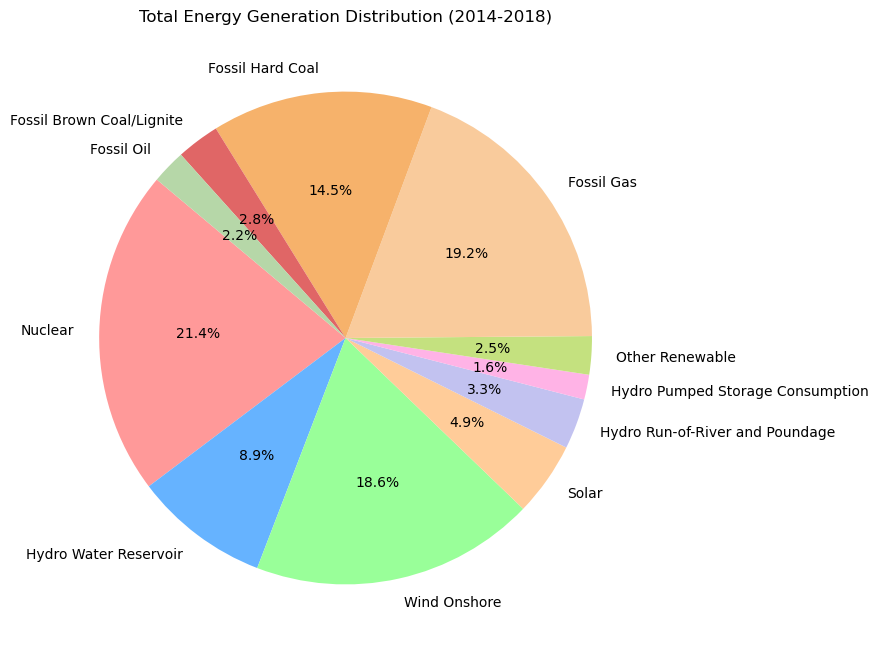

In [ ]:
# Adjusting the pie chart with distinct colors for each category and grouping similar categories together

# Data for the pie chart, keeping the percentages as calculated previously
data = {
    'Nuclear': 21.97,
    'Hydro Water Reservoir': 9.12,
    'Wind Onshore': 19.15,
    'Solar': 4.99,
    'Hydro Run-of-River and Poundage': 3.41,
    'Hydro Pumped Storage Consumption': 1.67,
    # Other Renewable Energy Sources
    'Other Renewable': 0.30 + 0.94 + 1.34,  # Other + Waste
    # Fossil Fuels
    'Fossil Gas': 19.72,
    'Fossil Hard Coal': 14.89,
    'Fossil Brown Coal/Lignite': 2.9,
    'Fossil Oil': 2.3
}

# Create a pie chart with distinct colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#f9cb9c', '#f6b26b', '#e06666', '#b6d7a8', '#ffd966']

plt.figure(figsize=(10, 8))
plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Total Energy Generation Distribution (2014-2018)')
plt.show()